# <font style="color: rgb(0,0,0);">Option B: </font> <font style="color: rgb(190,138,67);">Transport efficiency</font>

## modelling the Launch Segment

imitating ascent characteristics from Apollo return flights

> Apollo 11 https://www.hq.nasa.gov/alsj/nasa58040.pdf
<br>
> Apollo 17 https://history.nasa.gov/alsj/a17/A17_MissionReport.pdf

Segmented flight: vertical rise, orbit injection

In [28]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from io import StringIO
from csv import writer 
from scipy import integrate
import math
import numba
from numba import jit
import time as time_lib
from tqdm import tqdm
import xarray as xr
import subprocess
from multiprocessing import Pool

def current_milli_time():
    return round(time_lib.time() * 1000 *1000)

In [23]:
def create_Lat_Lon(resolution):
    # calculation steps in deg for geodetic location

    print('Result map resolution:',1+(360/resolution),'x',1+(180/resolution))
    n_total = (1+(360/resolution))*(1+(180/resolution))
    print('number of calculations:',n_total)

    if n_total != int(n_total): print("WARNING: non matching map!")

    Longitude = []
    Latitude = []

    for Lon in range(-180,181,resolution):
        Longitude.append(Lon)
    for Lat in range(-90,91,resolution):
        Latitude.append(Lat)

    Latitude = list(reversed(Latitude))
    
    return Latitude, Longitude

In [32]:
Latitude, Longitude = create_Lat_Lon(1)

Result image resolution: 361.0 x 181.0
number of calculations: 65341.0


In [36]:
####################################################################################
# WARNING !    this step takes approx. 22 hours to compute for 1 deg resolution    #
####################################################################################

Latitude, Longitude = create_Lat_Lon(15)
flat_value = len(Longitude)*len(Latitude)
Start_Height = [1]*flat_value
args = [Longitude,Latitude,Start_Height]

start_time = current_milli_time()

result = subprocess.check_output("B_Launch_Segment_solver.py" + " " + str(args).replace(" ", ""), shell=True)
print(result.decode("utf-8"))

end_time = current_milli_time()
duration = (end_time - start_time) / 1000
print('finished after',duration / 1000,'[s]')

Result image resolution: 25.0 x 13.0
number of calculations: 325.0
Done.

finished after 394.46840100000003 [s]


In [38]:
# load result array
with xr.open_dataarray("maps/Launch_Segement.nc") as ds:
    xA_result = ds.load()

xA_result

<xarray.DataArray (lat: 13, lon: 25)>
array([[3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999],
       [3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999],
       [3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
...
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999],
       [3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999],
       [3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999, 3084.29999999, 3084.29999999, 3084.29999999,
        3084.29999999]])
Coordinates:
  * lon      (lon) int16 -180 -165 -150 -135 -120 -105 ... 120 135 150 165 180
  * lat      (lat) int16 90 75 60 45 30 15 0 -15 -30 -45 -60 -75 -90
Attributes:
    description:  DeltaV to Gateway
    var_desc:     deltaV
    units:        m/s

In [11]:
####################################################################################
# WARNING !    this step takes approx. x hours to compute for 5 deg resolution     #
####################################################################################

# calculation steps in deg for geodetic location
resolution = 90

print('Result image resolution:',1+(360/resolution),'x',1+(180/resolution))
n_total = (1+(360/resolution))*(1+(180/resolution))
print('number of calculations:',n_total)

if n_total != int(n_total): print("WARNING: non matching map!")

Longitude = []
Latitude = []

for Lon in range(-180,181,resolution):
    Longitude.append(Lon)
for Lat in range(-90,91,resolution):
    Latitude.append(Lat)

Latitude = list(reversed(Latitude))

data_used_fuel = np.zeros((len(Latitude), len(Longitude)))
data_used_fuel[:] = np.nan

storage_result_table = np.zeros((len(Latitude), len(Longitude)))
storage_result_table[:] = np.nan

print()
print(len(Longitude),Longitude)
print()
print(len(Latitude),Latitude)

with tqdm(total=n_total) as pbar:
    for Lat_count, Lat in enumerate(Latitude):
        for Lon_count, Lon in enumerate(Longitude):
            #print("Lat:",Lat,"Lon:",Lon)
            used_fuel, df = simulation(t_step=0.1,
                               target_altitude=2000,
                               mass_dry=1600,
                               mass_full=8500)
            
            #storage_df[Lat_count][Lon_count] = df
            data_used_fuel[Lat_count][Lon_count] = used_fuel
                
            pbar.update(1)

Result image resolution: 5.0 x 3.0
number of calculations: 15.0

5 [-180, -90, 0, 90, 180]

3 [90, 0, -90]


100%|████████████████████████████████████████████████████████████████████████████████| 15/15.0 [00:07<00:00,  2.12it/s]


In [12]:
print(data_used_fuel)

[[3085.5 3085.5 3085.5 3085.5 3085.5]
 [3085.5 3085.5 3085.5 3085.5 3085.5]
 [3085.5 3085.5 3085.5 3085.5 3085.5]]


In [13]:
xA_used_fuel_df = xr.DataArray(
    data=data_used_fuel,
    dims=["lat","lon"],
    coords=dict(
        lon=(["lon"], Longitude),
        lat=(["lat"], Latitude)
    ),
    attrs=dict(
        description="Logging df",
        var_desc="Pandas df",
        units="multiple",
    ),
)

xA_used_fuel_df.to_netcdf("maps/used_fuel_df.nc")
xA_used_fuel_df

<xarray.DataArray (lat: 3, lon: 5)>
array([[3085.5, 3085.5, 3085.5, 3085.5, 3085.5],
       [3085.5, 3085.5, 3085.5, 3085.5, 3085.5],
       [3085.5, 3085.5, 3085.5, 3085.5, 3085.5]])
Coordinates:
  * lon      (lon) int32 -180 -90 0 90 180
  * lat      (lat) int32 90 0 -90
Attributes:
    description:  Logging df
    var_desc:     Pandas df
    units:        multiple

NameError: name 'phase3_end' is not defined

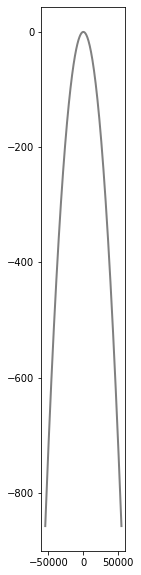

In [14]:
# plot path cartesian
dpi = 72

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10),dpi=dpi)

# Create 2x2 sub plots
gs = gridspec.GridSpec(ncols=3, nrows=1,width_ratios=[1,20,2.5])

pl.figure(figsize=(40,10))


# left
ax = pl.subplot(gs[0, 0]) # row 0, col 0

offset_y = r_moon
# moon surface
t = np.linspace(0.49*np.pi,0.51*np.pi,1000)
pl.plot(r_moon*np.cos(t), r_moon*np.sin(t)-offset_y,color='grey', linewidth=2)

xpoints = df.loc[0.0:phase3_end+2]['pos_x [m]']
ypoints = df.loc[0.0:phase3_end+2]['pos_y [m]']

max_x = np.max(xpoints)
max_y = np.max(ypoints-offset_y)
min_x = np.min(xpoints)
min_y = np.min(ypoints-offset_y)

pad_y = 1e1
pad_x = 1e2

ax.set_xlim(min_x-pad_x, max_x)
ax.set_ylim(min_y-pad_y, max_y+pad_y)

ax.set_aspect('equal', adjustable='box')
ax.grid(True)
pl.plot(xpoints[:round(phase1_end+1)],ypoints[:round(phase1_end+1)]-offset_y                                  , color='deeppink') # phase 1
pl.plot(xpoints[round(phase1_end):round(phase2_end+1)],ypoints[round(phase1_end):round(phase2_end+1)]-offset_y, color='magenta') # phase 2
pl.plot(xpoints[round(phase2_end):round(phase3_end+1)],ypoints[round(phase2_end):round(phase3_end+1)]-offset_y, color='darkviolet') # phase 3
pl.plot(xpoints[round(phase3_end):],ypoints[round(phase3_end):]-offset_y                        ,color='tab:blue') # phase 4

#middle
ax = pl.subplot(gs[0, 1])

t = np.linspace(0.45*np.pi,0.51*np.pi,1000)
pl.plot(r_moon*np.cos(t), r_moon*np.sin(t)-offset_y,color='grey', linewidth=2)

xpoints = df.loc[phase3_end:phase4_end]['pos_x [m]']
ypoints = df.loc[phase3_end:phase4_end]['pos_y [m]']

max_x = np.max(xpoints)
max_y = np.max(ypoints-offset_y)
min_x = np.min(xpoints)
min_y = np.min(ypoints-offset_y)

pad_y = 1e4
pad_x = 1e3

ax.set_xlim(min_x-pad_x, max_x)
ax.set_ylim(min_y-pad_y, max_y+pad_y)

ax.set_aspect('equal', adjustable='box')
ax.grid(True)
pl.plot(xpoints,ypoints-offset_y,color='tab:blue', linewidth=2) # phase 4

xpoints = df.loc[:phase3_end]['pos_x [m]']
ypoints = df.loc[:phase3_end]['pos_y [m]']

pl.plot(xpoints,ypoints-offset_y, linewidth=2, color='magenta') # until phase 4

# right
ax = pl.subplot(gs[0, 2]) # row 0, col 1
pl.plot([0,1])

# moon surface
t = np.linspace(0,2*np.pi,100)
pl.plot(r_moon*np.cos(t), r_moon*np.sin(t),color='grey', linewidth=2)

xpoints_prop = df.loc[phase4_end:]['pos_x [m]']
ypoints_prop = df.loc[phase4_end:]['pos_y [m]']
pl.plot(xpoints_prop,ypoints_prop, color='tab:green', linewidth=1) # propagate

xpoints = df.loc[0.0:phase4_end]['pos_x [m]']
ypoints = df.loc[0.0:phase4_end]['pos_y [m]']
pl.plot(xpoints,ypoints, linewidth=2 ) # start

ext = np.max(np.abs([ df['pos_x [m]'],df['pos_y [m]']]))

ax.set_ylim(-ext, ext)
ax.set_xlim(-ext, ext)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)

plt.savefig('doc/img/launch_segment.png',bbox_inches='tight',dpi=300)
#plt.axis('off')
plt.show()

# plot result properties graphs

df[['altitude [m]','vel_r [m/s]','vel_phi [m/s]','acc_r [m/s²]','acc_phi [m/s²]','dir_n [°]']].plot(subplots=True,figsize=(25,20),grid=True,xlim=[0, df.index[-1]])
#df.plot(subplots=True,figsize=(20,25))
plt.show()

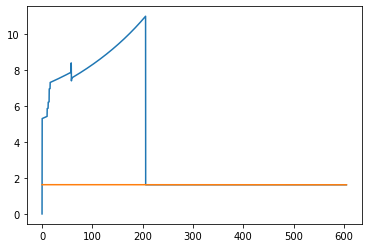

In [383]:
n = len(df['acc_x [m/s²]'].values)
result = np.zeros(n)

acc_x_val = df['acc_x [m/s²]'].values
acc_y_val = df['acc_y [m/s²]'].values

for i in range(n):
    x_vec = acc_x_val[i] * np.array([1,0,0])
    y_vec = acc_y_val[i] * np.array([0,1,0])
    result[i] = norm(x_vec+y_vec)

ypoints = result
xpoints = df.index

plt.plot(xpoints,ypoints)

def acc_grav_moon_2(alt):
    r = alt + r_moon
    r_val = G * (m_moon/(r**2))
    
    return r_val

#verify acc_x acc_y correct

alt = df['altitude [m]'].values
result = np.zeros(n)


for i in range(n):
    result[i]= acc_grav_moon_2(alt[i])
    

ypoints = result
xpoints = df.index

plt.plot(xpoints,ypoints)
plt.show()
# > pass, correct

#verify acc_x acc_y transform > acc_r correct





# STK

In [ ]:
# pip install "C:\Program Files\AGI\STK 12\bin\AgPythonAPI\agi.stk12-12.2.0-py3-none-any.whl"
# run this notebook from STK's Python Scripting Interface

In [ ]:
# STK library imports
from agi.stk12.stkdesktop import STKDesktop
from agi.stk12.stkobjects import *
from agi.stk12.stkutil import *
from agi.stk12.vgt import *
# if using astrogator uncomment the below
# from agi.stk12.stkobjects.astrogator
# if using aviator uncomment the below
# from agi.stk12.stkobjects.aviator

# Python helper library imports
import os
from tqdm.notebook import tqdm
from ipywidgets import *
import time
import numpy as np
import plotly.express as px
import xarray as xr

In [ ]:
# helper functions

# model for launch segment

# plot xArray data

## Destination: Gateway (Near-Rectilinear Halo Orbit)
> open file "Gateway_PROP_Mass_Point.sc" in STK

### connect to STK session and grab elements

In [ ]:
# Get reference to the current instance of STK
STK_PID = os.getenv('STK_PID')
stk = STKDesktop.AttachToApplication(pid=int(STK_PID))
root = stk.Root

# rewind to initial datetime
scenario = root.CurrentScenario
scenario.SetTimePeriod('01 Jan 2022 00:00:00.000','03 Jan 2022 00:00:00.000')
root.Rewind()

# load existing Satellite and Place
satellite = root.CurrentScenario.Children.Item('NRHO_Sat')
place_start = root.CurrentScenario.Children.Item('Start')
place_start.Position.AssignGeodetic(0,0,0)

In [ ]:
#satellite  = AgSatellite(root.CurrentScenario.Children.New(AgESTKObjectType.eSatellite,"LeoSat"))
#place_start  = AgPlace(scenario.Children.New(AgESTKObjectType.ePlace,"Start"))

In [ ]:
#def analyse(object):
#    print([method_name for method_name in dir(object)if callable(getattr(object, method_name))])
#print(satellite.Propagator.__dict__.keys())

# use dir() instead

In [ ]:
#analyse(satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).Results.Item(0))
#analyse(satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).ControlParameters.Item(0))
#dir(satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).ControlParameters.Item(0))
# Name
# FinalValue
# LastUpdate
#dir(satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).Results.Item(0))
# Name
# CurrentValue
# DesiredValue
# Difference
# Values


# pull data
#print(satellite.Propagator.MainSequence.Item(2).GetResultValue('Eccentricity'))

#satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).ControlParameters.Item(0).FinalValue
#satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).Results.Item(0).Name

# set data
#satellite.Propagator.MainSequence.Item(0).Segments.Item(0).BurnoutVelocity._SetFixedVelocity(1)
#satellite.Propagator.MainSequence.Item(0).Segments.Item(0).DisplaySystem.Latitude = 44
#satellite.Propagator.MainSequence.Item(0).Segments.Item(0).Burnout.Azimuth = 0

In [ ]:
#airtemps = xr.tutorial.open_dataset('air_temperature').air.isel(time=500)
#airtemps

In [ ]:
#colorbar_title = results.attrs['var_desc'] + '<br>(%s)'%results.attrs['units']
#fig = px.imshow(results, color_continuous_scale='RdBu_r', aspect='equal')
#fig.show()
#fig.write_image("images/fig1.pdf")
#print(satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).ControlParameters.Item(0).FinalValue*1000)
#print()
#print(satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(0).Name)
#print(satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(0).FinalValue*1000)
#print(satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(1).FinalValue*1000)
#print(satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(2).FinalValue*1000)

#dir(satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(0))

#print(satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).Status)

#dv2_x = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(0).FinalValue*1000
#dv2_y = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(1).FinalValue*1000
#dv2_z = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(2).FinalValue*1000
#dv2_vec = np.array([dv2_x, dv2_y, dv2_z])
#dv2 = np.linalg.norm(dv2_vec)
#print(dv2)

### control STK and compute global result

In [ ]:
####################################################################################
# WARNING !    this step takes approx. 4 hours to compute for 5 deg resolution     #
####################################################################################

# calculation steps in deg for geodetic location
resolution = 30

print('Result image resolution:',1+(360/resolution),'x',1+(180/resolution))
n_total = (1+(360/resolution))*(1+(180/resolution))
print('number of calculations:',n_total)

if n_total != int(n_total): print("WARNING: non matching map!")

Longitude = []
Latitude = []

for Lon in range(-180,181,resolution):
    Longitude.append(Lon)
for Lat in range(-90,91,resolution):
    Latitude.append(Lat)


Latitude = list(reversed(Latitude))

deltaV_Gateway = np.zeros((len(Latitude), len(Longitude)))
deltaV_Gateway[:] = np.nan

fuel_mass_Gateway = np.zeros((len(Latitude), len(Longitude)))
fuel_mass_Gateway[:] = np.nan

print()
print(len(Longitude),Longitude)
print()
print(len(Latitude),Latitude)

with tqdm(total=n_total) as pbar:
    for Lat_count, Lat in enumerate(Latitude):
        for Lon_count, Lon in enumerate(Longitude):
            #print("Lat:",Lat,"Lon:",Lon)
            place_start.Position.AssignGeodetic(Lat,Lon,0)
            satellite.Propagator.MainSequence.Item(0).Segments.Item(0).DisplaySystem.Latitude = Lat
            satellite.Propagator.MainSequence.Item(0).Segments.Item(0).DisplaySystem.Longitude = Lon
            if Lon > -90 and Lon < 90:
                satellite.Propagator.MainSequence.Item(0).Segments.Item(0).Burnout.Azimuth = -180
            else:
                satellite.Propagator.MainSequence.Item(0).Segments.Item(0).Burnout.Azimuth = 0
                
            satellite.Propagator.RunMCS()
            check1 = satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).Status
            check2 = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).Status
            if check1 == "Converged" and check2 == "Converged":
                
                # Launch: Burnout.FixedVelocity
                dv1 = satellite.Propagator.MainSequence.Item(0).Profiles.Item(0).ControlParameters.Item(0).FinalValue*1000
                # Maneuver: ImpulsiveMnvr.Pointing.Cartesian.X /Y /Z
                dv2_x = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(0).FinalValue*1000
                dv2_y = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(1).FinalValue*1000
                dv2_z = satellite.Propagator.MainSequence.Item(3).Profiles.Item(0).ControlParameters.Item(2).FinalValue*1000
                dv2_vec = np.array([dv2_x, dv2_y, dv2_z])
                dv2 = np.linalg.norm(dv2_vec)

                deltaV_Gateway[Lat_count][Lon_count] = dv2
                fuel_mass_Gateway[Lat_count][Lon_count] = 0
                
            else:
                print("ERROR","did NOT Converge for","Lat:",Lat,"Lon:",Lon)
                
            pbar.update(1)

### save result in xArray

In [ ]:
xA_fuel_mass_Gateway = xr.DataArray(
    data=fuel_mass_Gateway,
    dims=["lat","lon"],
    coords=dict(
        lon=(["lon"], Longitude),
        lat=(["lat"], Latitude)
    ),
    attrs=dict(
        description="DeltaV to Gateway",
        var_desc="deltaV",
        units="m/s",
    ),
)

xA_fuel_mass_Gateway.to_netcdf("maps/fuel_mass_Gateway.nc")

In [ ]:
# load array
xA_fuel_mass_Gateway = xr.open_dataarray("maps/fuel_mass_Gateway.nc")

In [ ]:
colorbar_title = xA_fuel_mass_Gateway.attrs['var_desc'] + '<br>(%s)'%xA_fuel_mass_Gateway.attrs['units']

#fig = px.imshow(results, color_continuous_scale='RdBu_r', aspect='equal')
fig = px.imshow(img=xA_fuel_mass_Gateway,
                width=1000,
                height=500,
                color_continuous_scale='blugrn_r',
                aspect='equal')

fig.update_xaxes(tickangle=0,
                 tickmode = 'array',
                 tickvals = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
fig.update_yaxes(tickangle=0,
                 tickmode = 'array',
                 tickvals = [-90,-60,-30,0,30,60,90])


fig.update_layout(
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    title= 'DeltaV Map<br>Destination Gateway',
    title_x=0.45
)


#fig.write_image("fig/dv1.pdf")
fig.write_image("doc/img/dv_Gateway.pdf")
fig.show()


In [ ]:
#print(scenario.StartTime)
#print(scenario.StopTime)

In [ ]:
root.ExecuteCommand('SetState */Satellite/LeoSat Classical TwoBody "' +
                    str(scenario.StartTime) + '" "' + str(scenario.StopTime) +
                    '" 60 ICRF  "' + str(scenario.StartTime) + '" 7200000.0 0.0 90 0.0 0.0 0.0')

In [ ]:
access = satellite.GetAccessToObject(target)
access.ComputeAccess()

In [ ]:
accessDP         = access.DataProviders.Item('Access Data')

results          = accessDP.Exec(scenario.StartTime, scenario.StopTime)

accessStartTimes = results.DataSets.GetDataSetByName('Start Time').GetValues()

accessStopTimes  = results.DataSets.GetDataSetByName('Stop Time').GetValues()

print(accessStartTimes,accessStopTimes)

In [ ]:
accessIntervals = access.ComputedAccessIntervalTimes

dataProviderElements = ['Start Time', 'Stop Time']

for i in range(0,accessIntervals.Count):
    times = accessIntervals.GetInterval(i)
    print(times)

### Retrieve the Satellite Altitude Data From STK

Retrieve and view the altitude of the satellite during an access interval. In the following lines, note how the data providers must follow the data provider folder, sub-folder, and selection.

In [ ]:
satelliteDP       = satellite.DataProviders.Item('LLA State')

satelliteDP2      = satelliteDP.Group.Item('Fixed')

rptElements       = ['Time', 'Lat', 'Lon', 'Alt']

satelliteDPTimeVar = satelliteDP2.ExecElements(accessStartTimes,accessStopTimes, 60, rptElements)

satelliteAltitude = satelliteDPTimeVar.DataSets.GetDataSetByName('Alt').GetValues()

print(satelliteAltitude)

## Destination: Low Lunar Orbit (Equatorial)
> open file "Gateway_PROP_Mass_Point.sc" in STK

In [ ]:
# Get reference to the current instance of STK
STK_PID = os.getenv('STK_PID')
stk = STKDesktop.AttachToApplication(pid=int(STK_PID))
root = stk.Root

# rewind to initial datetime
scenario = root.CurrentScenario
scenario.SetTimePeriod('01 Jan 2022 00:00:00.000','03 Jan 2022 00:00:00.000')
root.Rewind()

# load existing Satellite and Place
satellite = root.CurrentScenario.Children.Item('LLO_Sat_Eq')
place_start = root.CurrentScenario.Children.Item('Start')
place_start.Position.AssignGeodetic(0,0,0)

## Destination: Low Lunar Orbit (Polar)
> open file "Gateway_PROP_Mass_Point.sc" in STK

In [ ]:
# Get reference to the current instance of STK
STK_PID = os.getenv('STK_PID')
stk = STKDesktop.AttachToApplication(pid=int(STK_PID))
root = stk.Root

# rewind to initial datetime
scenario = root.CurrentScenario
scenario.SetTimePeriod('01 Jan 2022 00:00:00.000','03 Jan 2022 00:00:00.000')
root.Rewind()

# load existing Satellite and Place
satellite = root.CurrentScenario.Children.Item('LLO_Sat_Pol')
place_start = root.CurrentScenario.Children.Item('Start')
place_start.Position.AssignGeodetic(0,0,0)

## Destination: Lagrange Point (L1) - Earth Moon System
> open file "Gateway_PROP_Mass_Point.sc" in STK

## Destination: Low Earth Orbit (Equatorial) - Starship refuel
> open file "Gateway_PROP_Mass_Point.sc" in STK